In [13]:
import numpy as np
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)


TensorFlow version: 2.0.0-beta1


In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:
from PIL import Image

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rescale=1./255)
train_images = image_datagen.flow_from_directory(
    'C:\\Users\\alpst\\Box Sync\\PhD\\fire\\train',
    class_mode='binary')
dev_images = image_datagen.flow_from_directory(
    'C:\\Users\\alpst\\Box Sync\\PhD\\fire\\dev',
    class_mode='binary')
test_images = image_datagen.flow_from_directory(
    'C:\\Users\\alpst\\Box Sync\\PhD\\fire\\test',
    class_mode='binary')



Found 121 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, TimeDistributed
from tensorflow.keras import backend as K


# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = 'C:\\Users\\alpst\\Box Sync\\PhD\\fire\\train'
validation_data_dir = 'C:\\Users\\alpst\\Box Sync\\PhD\\fire\\test'
nb_train_samples = 128
nb_validation_samples = 48
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 121 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Epoch 1/50
8/8 [==============================] - 3s 364ms/step - loss: 0.6292 - accuracy: 0.7273 - val_loss: 0.6260 - val_accuracy: 0.7292
Epoch 2/50
8/8 [==============================] - 1s 152ms/step - loss: 0.6187 - accuracy: 0.6942 - val_loss: 0.5861 - val_accuracy: 0.7292
Epoch 3/50
8/8 [==============================] - 1s 171ms/step - loss: 0.6248 - accuracy: 0.7190 - val_loss: 0.5820 - val_accuracy: 0.7292
Epoch 4/50
8/8 [==============================] - 1s 171ms/step - loss: 0.6395 - accuracy: 0.7190 - val_loss: 0.6077 - val_accuracy: 0.7292
Epoch 5/50
8/8 [==============================] - 1s 171ms/step - loss: 0.6058 - accuracy: 0.7190 - val_loss: 0.5826 - val_accuracy: 0.7292
Epoch 6/50
8/8 [==============================] - 1s 163ms/step - loss: 0.5921 - accuracy: 0.7190 - val_loss: 0.5810 - val_accuracy: 0.7292
Epoch 7/50
8/8 [==============================] - 1s 164ms/step - loss: 0.6724 

In [23]:
print (K.eval(model.optimizer.lr))

0.001


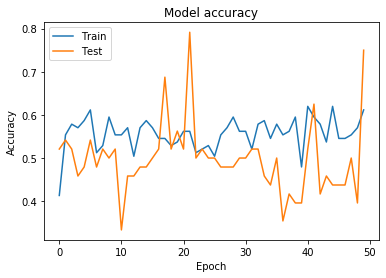

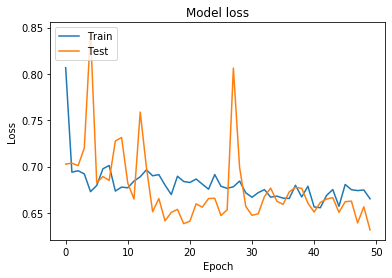

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


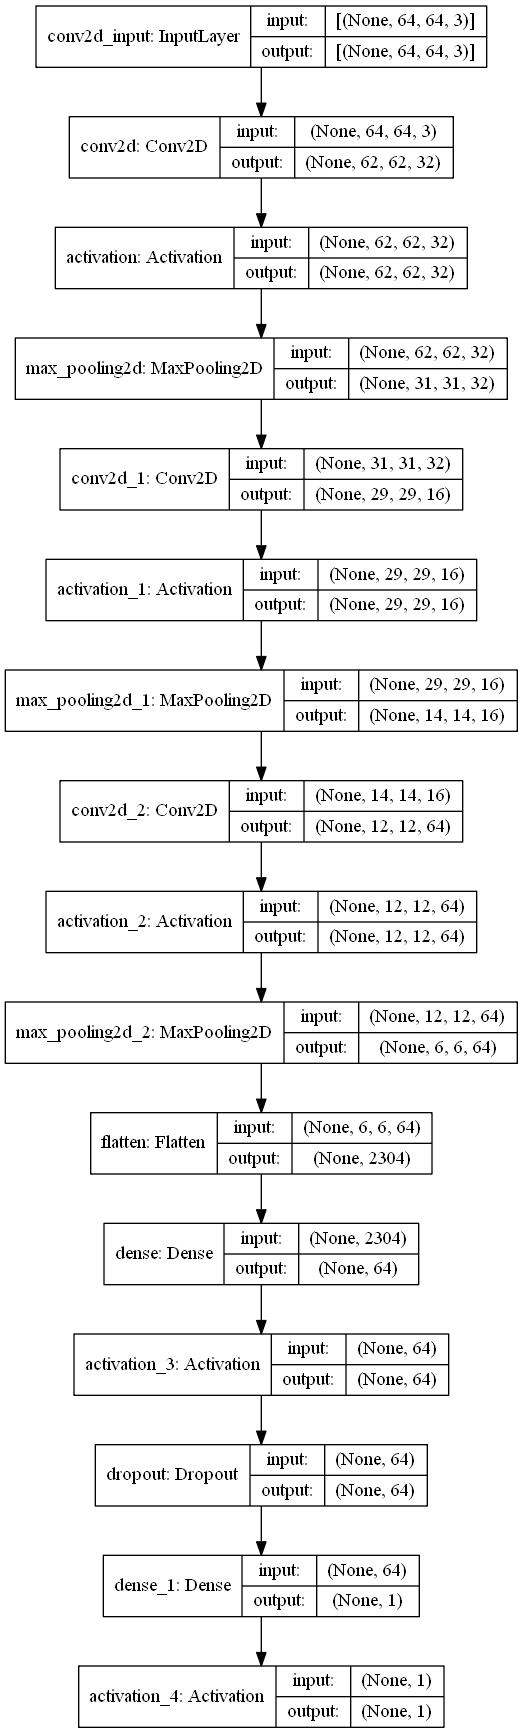

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
validation_steps=nb_validation_samples//16
x_valid, y_valid=validation_generator.next()
model.evaluate_generator(generator=validation_generator, steps=validation_steps)
STEP_SIZE_TEST=validation_generator.n//16
validation_generator.reset()
pred=model.predict_generator(x_valid,
steps=STEP_SIZE_TEST,verbose=1)
predicted = (pred>0.5)
report = classification_report(y_valid, predicted)
print(report)



In [ ]:
plt.imshow(X[3][3])


In [ ]:
In [144]: mean_images=(np.mean(np.array(X), axis=tuple(range(np.array(X).ndim-1))))
std_images=(np.std(np.array(X), axis=tuple(range(np.array(X).ndim-1))))
    


In [ ]:
output_images = []
for i in range(len(X)):
        image = tf.load_img(X[i], target_size=(124, 124),interpolation='bilinear')
        img_arr = img_to_array(image)
        # Scale
        figure = (img_arr / 255.).astype(np.float32)
        # Normalize
        figure = (figure - mean_images) / std_images
        output_images.append(figure)

In [ ]:
from sklearn.model_selection import train_test_split
train_path, test_path, train_y, test_y =  train_test_split(X,Y, test_size=0.20, random_state=10)
train_path, valid_path, train_y, valid_y = train_test_split(train_path, train_y, test_size=0.20, random_state=10)

In [9]:
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence


class DataGenerator(Sequence):
    """Generates data for Keras
    Sequence based data generator. Suitable for building data generator for training and prediction.
    """
    def __init__(self, list_IDs, labels, image_path, mask_path,
                 to_fit=True, batch_size=32, dim=(256, 256),
                 n_channels=1, n_classes=10, shuffle=True):
        """Initialization
        :param list_IDs: list of all 'label' ids to use in the generator
        :param labels: list of image labels (file names)
        :param image_path: path to images location
        :param mask_path: path to masks location
        :param to_fit: True to return X and y, False to return X only
        :param batch_size: batch size at each iteration
        :param dim: tuple indicating image dimension
        :param n_channels: number of image channels
        :param n_classes: number of output masks
        :param shuffle: True to shuffle label indexes after every epoch
        """
        self.list_IDs = list_IDs
        self.labels = labels
        self.image_path = image_path
        self.mask_path = mask_path
        self.to_fit = to_fit
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch
        :return: number of batches per epoch
        """
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        """Generate one batch of data
        :param index: index of the batch
        :return: X and y when fitting. X only when predicting
        """
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = self._generate_X(list_IDs_temp)

        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else:
            return X

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_X(self, list_IDs_temp):
        """Generates data containing batch_size images
        :param list_IDs_temp: list of label ids to load
        :return: batch of images
        """
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = self._load_grayscale_image(self.image_path + self.labels[ID])

        return X

    def _generate_y(self, list_IDs_temp):
        """Generates data containing batch_size masks
        :param list_IDs_temp: list of label ids to load
        :return: batch if masks
        """
        y = np.empty((self.batch_size, *self.dim), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            y[i,] = self._load_grayscale_image(self.mask_path + self.labels[ID])

        return y

    def _load_grayscale_image(self, image_path):
        """Load grayscale image
        :param image_path: path to image to load
        :return: loaded image
        """
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255
        return img

In [25]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(tf.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return tf.array(data), np.array(labels)

In [26]:
train_generator.shape()

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [27]:
univariate_past_history = 5
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(train_generator, 0, None,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(validation_generator, 0, None,
                                       univariate_past_history,
                                       univariate_future_target)

TypeError: '>=' not supported between instances of 'range' and 'int'

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, TimeDistributed
from tensorflow.keras import backend as K
model = Sequential()
# input, with 64 convolutions for 5 images
# that have (224, 224, 3) shape
model.add(
    TimeDistributed(
        Conv2D(64, (3,3), 
            padding='same', strides=(2,2), activation='relu'),
        input_shape = (5, 224, 224, 3)
    )
)
model.add(
    TimeDistributed( 
        Conv2D(64, (3,3), 
            padding='same', strides=(2,2), activation='relu')
    )
)
model.add(
    TimeDistributed(
        MaxPooling2D((2,2), strides=(2,2))
    )
)
# Second conv, 128
model.add(
    TimeDistributed(
        Conv2D(128, (3,3),
            padding='same', strides=(2,2), activation='relu')
    )
)
model.add(
    TimeDistributed( 
        Conv2D(128, (3,3),
            padding='same', strides=(2,2), activation='relu')
    )
)
model.add(
    TimeDistributed(
        MaxPooling2D((2,2), strides=(2,2))
    )
)
## and so on with 512, 1024... 
## ...
# then we can use Flatten to reduce dimension to 1
model.add(Flatten())
## and then... merge the entire outputs to
## be able to use Dense(), and make predictions...
model.add(Dense(10))
# ...